In [1]:
# Packages for numerics + dataframes
import pandas as pd               
import numpy as np


# Packages for visualization
import seaborn as sns
import matplotlib.pyplot as plt


from scipy import stats

# Packages for date conversions for calculating trip durations
from datetime import datetime
from datetime import date
from datetime import timedelta

# Packages for OLS, MLR, confusion matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics 

# For confusion matrix

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance

In [2]:
# Load dataset into dataframe
df = pd.read_csv('2017_Yellow_Taxi_Trip_Data.csv')

In [3]:
df.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80
5,23345809,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36
6,37660487,2,05/03/2017 7:04:09 PM,05/03/2017 8:03:47 PM,1,12.83,1,N,79,241,1,47.5,1.0,0.5,9.86,0.0,0.3,59.16
7,69059411,2,08/15/2017 5:41:06 PM,08/15/2017 6:03:05 PM,1,2.98,1,N,237,114,1,16.0,1.0,0.5,1.78,0.0,0.3,19.58
8,8433159,2,02/04/2017 4:17:07 PM,02/04/2017 4:29:14 PM,1,1.20,1,N,234,249,2,9.0,0.0,0.5,0.00,0.0,0.3,9.80
9,95294817,1,11/10/2017 3:20:29 PM,11/10/2017 3:40:55 PM,1,1.60,1,N,239,237,1,13.0,0.0,0.5,2.75,0.0,0.3,16.55


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

In [5]:
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


In [6]:
# Sort the data by trip distance from maximum to minimum value

df_sort = df.sort_values(by=['trip_distance'],ascending=False)
df_sort.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
9280,51810714,2,06/18/2017 11:33:25 PM,06/19/2017 12:12:38 AM,2,33.96,5,N,132,265,2,150.00,0.0,0.0,0.00,0.00,0.3,150.30
13861,40523668,2,05/19/2017 8:20:21 AM,05/19/2017 9:20:30 AM,1,33.92,5,N,229,265,1,200.01,0.0,0.5,51.64,5.76,0.3,258.21
6064,49894023,2,06/13/2017 12:30:22 PM,06/13/2017 1:37:51 PM,1,32.72,3,N,138,1,1,107.00,0.0,0.0,55.50,16.26,0.3,179.06
10291,76319330,2,09/11/2017 11:41:04 AM,09/11/2017 12:18:58 PM,1,31.95,4,N,138,265,2,131.00,0.0,0.5,0.00,0.00,0.3,131.80
29,94052446,2,11/06/2017 8:30:50 PM,11/07/2017 12:00:00 AM,1,30.83,1,N,132,23,1,80.00,0.5,0.5,18.56,11.52,0.3,111.38
18130,90375786,1,10/26/2017 2:45:01 PM,10/26/2017 4:12:49 PM,1,30.50,1,N,132,220,1,90.50,0.0,0.5,19.85,8.16,0.3,119.31
5792,68023798,2,08/11/2017 2:14:01 PM,08/11/2017 3:17:31 PM,1,30.33,2,N,132,158,1,52.00,0.0,0.5,14.64,5.76,0.3,73.20
15350,77309977,2,09/14/2017 1:44:44 PM,09/14/2017 2:34:29 PM,1,28.23,2,N,13,132,1,52.00,0.0,0.5,4.40,5.76,0.3,62.96
10302,43431843,1,05/15/2017 8:11:34 AM,05/15/2017 9:03:16 AM,1,28.20,2,N,90,132,1,52.00,0.0,0.5,11.71,5.76,0.3,70.27
2592,51094874,2,06/16/2017 6:51:20 PM,06/16/2017 7:41:42 PM,1,27.97,2,N,261,132,2,52.00,4.5,0.5,0.00,5.76,0.3,63.06


In [7]:
# Sort the data by total amount and print the top 20 values
total_amount_sorted = df.sort_values(
    ['total_amount'], ascending=False)['total_amount']
total_amount_sorted.head(20)

8476     1200.29
20312     450.30
13861     258.21
12511     233.74
15474     211.80
6064      179.06
16379     157.06
3582      152.30
11269     151.82
9280      150.30
1928      137.80
10291     131.80
6708      126.00
11608     123.30
908       121.56
7281      120.96
18130     119.31
13621     115.94
13359     111.95
29        111.38
Name: total_amount, dtype: float64

In [8]:
# How many of each payment type are represented in the data?
df['payment_type'].value_counts()

1    15265
2     7267
3      121
4       46
Name: payment_type, dtype: int64

In [9]:
# What is the average tip for trips paid for with credit card?
avg_cc_tip = df[df['payment_type']==1]['tip_amount'].mean()
print('Avg. cc tip:', avg_cc_tip)

# What is the average tip for trips paid for with cash?
avg_cash_tip = df[df['payment_type']==2]['tip_amount'].mean()
print('Avg. cash tip:', avg_cash_tip)

Avg. cc tip: 2.7298001965279934
Avg. cash tip: 0.0


### Data visualization

### Boxplots

<AxesSubplot:title={'center':'trip distance'}, xlabel='trip_distance'>

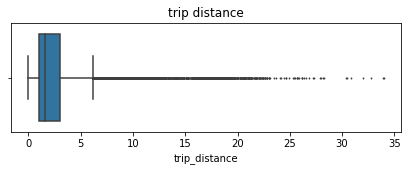

In [10]:
# Convert data columns to datetime
df['tpep_dropoff_datetimepep'] = pd.to_datetime(df['tpep_dropoff_datetime'])
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])


plt.figure(figsize=(7,2))
plt.title('trip distance')
sns.boxplot(data=None,x=df['trip_distance'],fliersize=1)

<AxesSubplot:title={'center':'trip distance'}, xlabel='trip_distance'>

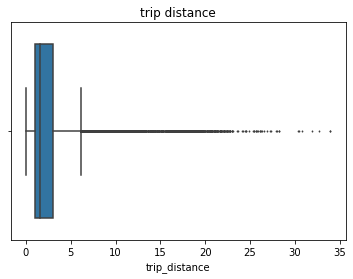

In [11]:
# Create box plot of trip_distance
plt.title('trip distance')

sns.boxplot(data=None,x=df['trip_distance'],fliersize=1)

<AxesSubplot:xlabel='trip_distance', ylabel='Count'>

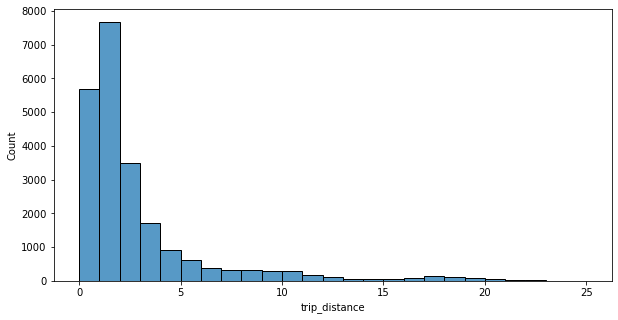

In [12]:
# Create histogram of trip_distance


plt.figure(figsize=(10,5))
sns.histplot(x=df['trip_distance'],bins=range(0,26,1))

<AxesSubplot:title={'center':'total amount'}, xlabel='total_amount'>

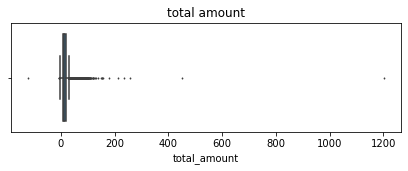

In [13]:
# Create box plot of total_amount
plt.figure(figsize=(7,2))
plt.title('total amount')
sns.boxplot(data=None,x=df['total_amount'],fliersize=1)


Text(0.5, 1.0, 'Total amount Histogram')

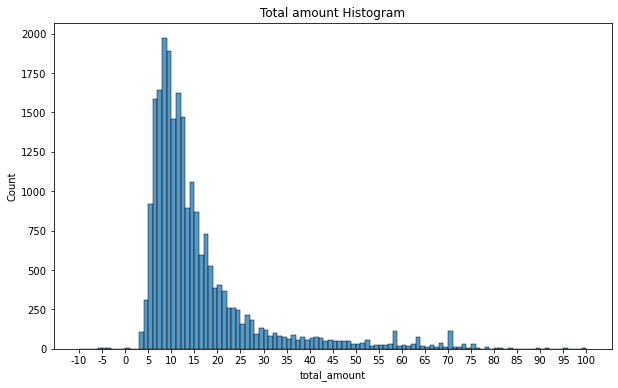

In [14]:
# Create histogram of total_amount
plt.figure(figsize=(10,6))

ax = sns.histplot(x=df['total_amount'],bins=range(-10,101,1))
ax.set_xticks(range(-10,101,5))
ax.set_xticklabels(range(-10,101,5))
plt.title('Total amount Histogram')

<AxesSubplot:title={'center':'Tip Amount'}, xlabel='tip_amount'>

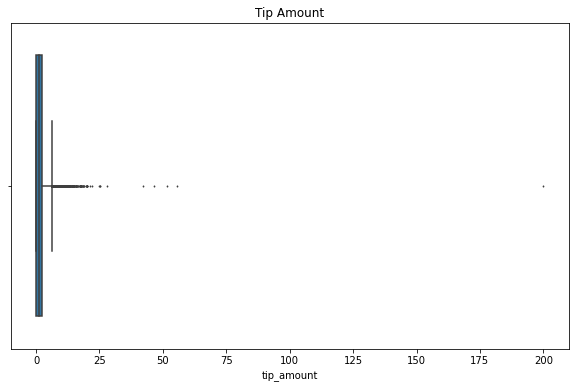

In [15]:
# Create box plot of tip_amount

plt.figure(figsize=(10,6))
plt.title('Tip Amount')
sns.boxplot(data=None,x=df['tip_amount'],fliersize=1)

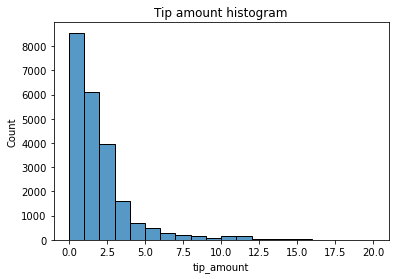

In [16]:
# Create histogram of tip_amount

sns.histplot(x=df['tip_amount'],bins=range(0,21,1))
ax.set_xticks(range(0,21,1))
ax.set_xticklabels(range(0,21,1))
plt.title('Tip amount histogram');

Text(0.5, 1.0, 'Tip amount by vendor histogram')

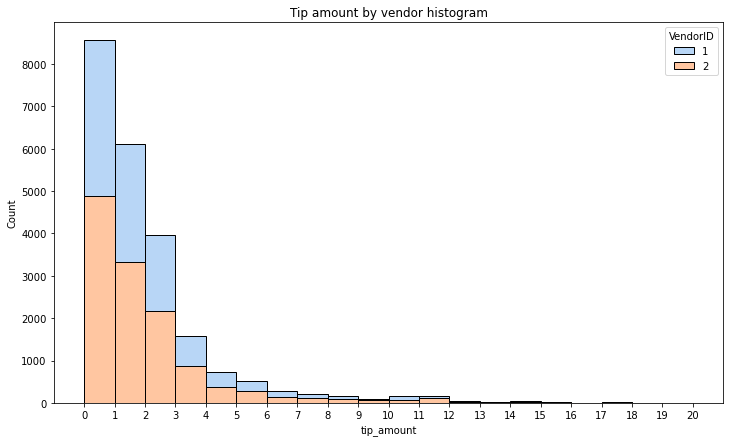

In [17]:
# Create histogram of tip_amount by vendor
plt.figure(figsize=(12,7))
ax = sns.histplot(data=df,x='tip_amount',bins=range(0,21,1),
                 hue='VendorID',
                 multiple='stack',
                 palette='pastel')
ax.set_xticks(range(0,21,1))
ax.set_xticklabels(range(0,21,1))
plt.title('Tip amount by vendor histogram')


Text(0.5, 1.0, 'Tip amount by vendor histogram')

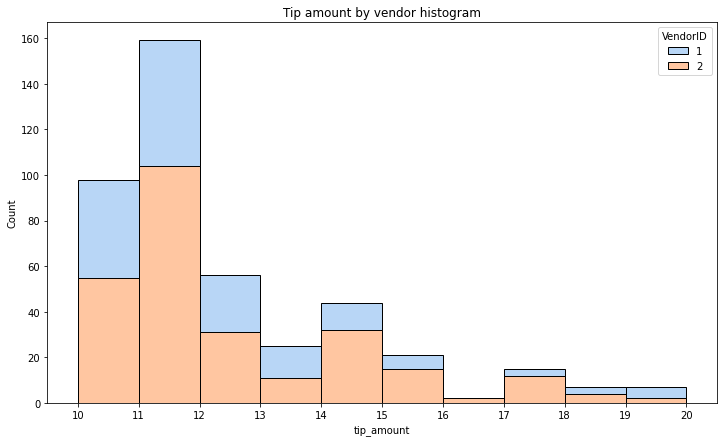

In [18]:
# Create histogram of tip_amount by vendor for tips > $10 
plt.figure(figsize=(12,7))
ax = sns.histplot(data=df[df['tip_amount'] > 10],x='tip_amount',bins=range(10,21,1),
                 hue='VendorID',
                 multiple='stack',
                 palette='pastel')
ax.set_xticks(range(10,21,1))
ax.set_xticklabels(range(10,21,1))
plt.title('Tip amount by vendor histogram')


In [19]:
# Calculate mean tips by passenger_count
#==> ENTER YOUR CODE HERE
mean_tips_by_passenger_count = df.groupby(['passenger_count']).mean()[['tip_amount']]
mean_tips_by_passenger_count

,tip_amount
passenger_count,
0,2.135758
1,1.848920
2,1.856378
3,1.716768
4,1.530264
5,1.873185
6,1.720260


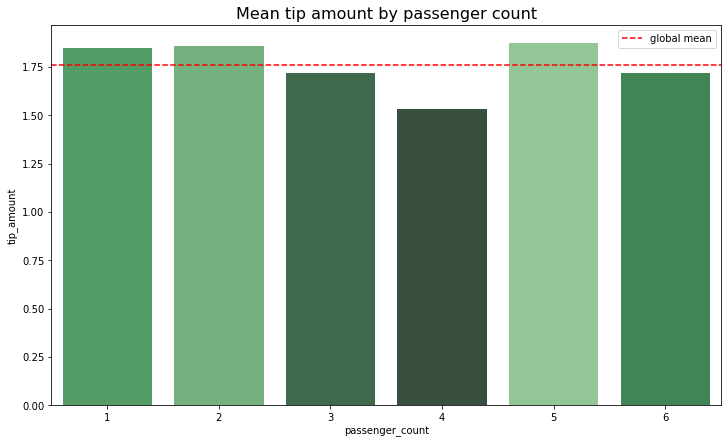

In [20]:
# Create bar plot for mean tips by passenger count

data=mean_tips_by_passenger_count.tail(-1)
pal = sns.color_palette('Greens_d',len(data))
rank = data['tip_amount'].argsort().argsort()
plt.figure(figsize=(12,7))
ax = sns.barplot(x=data.index,
                y=data['tip_amount'],
                palette=np.array(pal[::-1])[rank])
ax.axhline(data['tip_amount'].mean(),ls='--',color='red',label='global mean')
ax.legend()

plt.title('Mean tip amount by passenger count', fontsize=16);

In [21]:
# Create a month column

df['month'] = df['tpep_pickup_datetime'].dt.month_name()
# Create a day column

df['day'] = df['tpep_pickup_datetime'].dt.day_name()

In [22]:
# Get total number of rides for each month

monthly_rides = df['month'].value_counts()
monthly_rides

March        2049
October      2027
April        2019
May          2013
January      1997
June         1964
December     1863
November     1843
February     1769
September    1734
August       1724
July         1697
Name: month, dtype: int64

In [23]:
# Reorder the monthly ride list so months go in order

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
         'August', 'September', 'October', 'November', 'December']

monthly_rides = monthly_rides.reindex(index=month_order)
monthly_rides

January      1997
February     1769
March        2049
April        2019
May          2013
June         1964
July         1697
August       1724
September    1734
October      2027
November     1843
December     1863
Name: month, dtype: int64

In [24]:
# Show the index

monthly_rides.index

Index(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype='object')

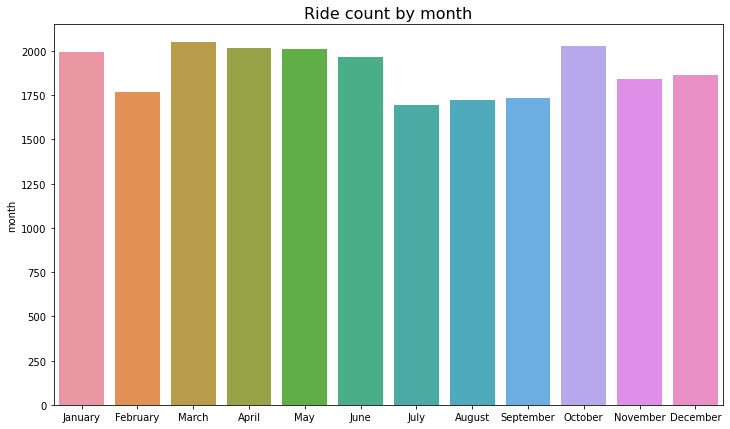

In [25]:
# Create a bar plot of total rides per month

plt.figure(figsize=(12,7))
ax = sns.barplot(x=monthly_rides.index,y=monthly_rides)
ax.set_xticklabels(month_order)
plt.title('Ride count by month', fontsize=16);

In [26]:
# Repeat the above process, this time for rides by day

daily_rides = df['day'].value_counts()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

daily_rides = daily_rides.reindex(index=day_order)
daily_rides

Monday       2931
Tuesday      3198
Wednesday    3390
Thursday     3402
Friday       3413
Saturday     3367
Sunday       2998
Name: day, dtype: int64

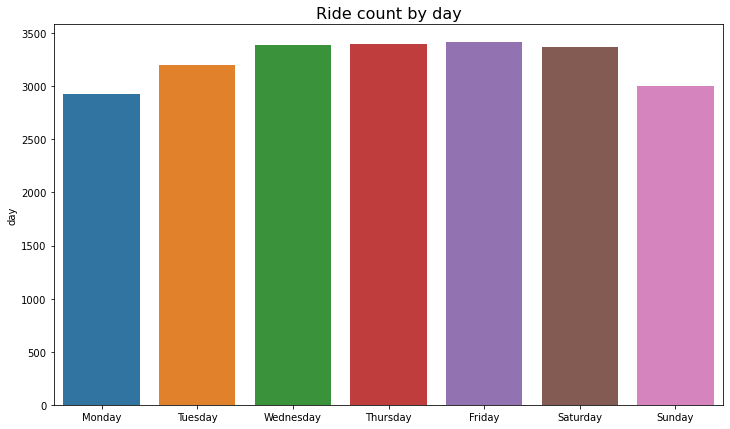

In [27]:
# Create bar plot for ride count by day

plt.figure(figsize=(12,7))
ax = sns.barplot(x=daily_rides.index,y=daily_rides)
ax.set_xticklabels(day_order)
plt.title('Ride count by day', fontsize=16);

In [28]:
# Repeat the process, this time for total revenue by day

total_amount_day = df.groupby('day').sum()[['total_amount']]
total_amount_day = total_amount_day.reindex(index=day_order)
total_amount_day

,total_amount
day,
Monday,49574.37
Tuesday,52527.14
Wednesday,55310.47
Thursday,57181.91
Friday,55818.74
Saturday,51195.40
Sunday,48624.06


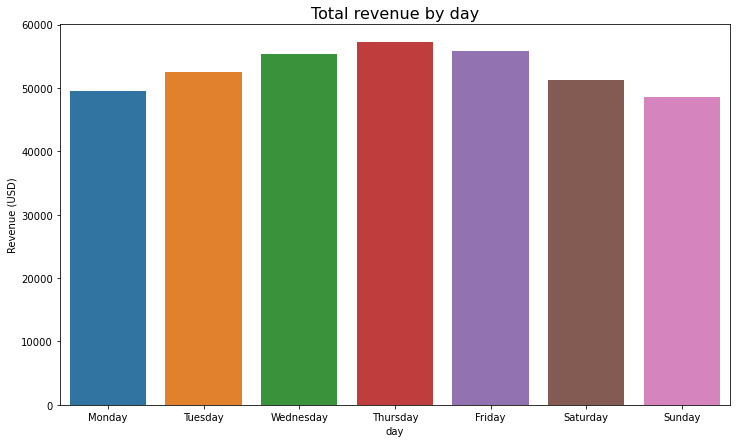

In [29]:
# Create bar plot of total revenue by day

plt.figure(figsize=(12,7))
ax = sns.barplot(x=total_amount_day.index,y=total_amount_day['total_amount'])
ax.set_xticklabels(day_order)
ax.set_ylabel('Revenue (USD)')
plt.title('Total revenue by day', fontsize=16);

In [30]:
# Repeat the process, this time for total revenue by month

total_revenue_month = df.groupby('month').sum()[['total_amount']]
total_revenue_month = total_revenue_month.reindex(index=month_order)
total_revenue_month

,total_amount
month,
January,31735.25
February,28937.89
March,33085.89
April,32012.54
May,33828.58
June,32920.52
July,26617.64
August,27759.56
September,28206.38


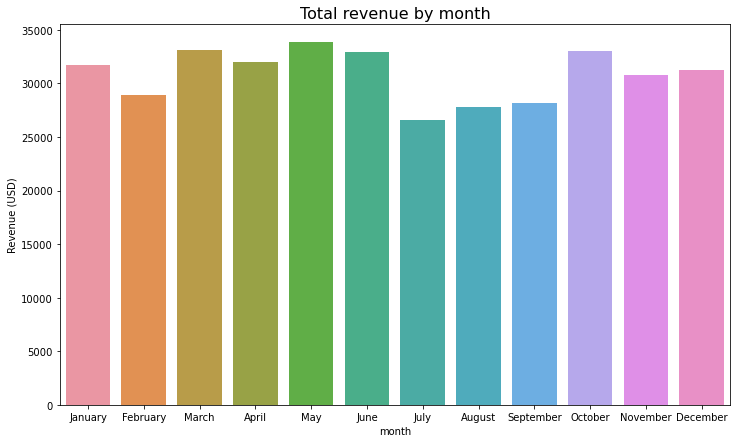

In [31]:
# Create a bar plot of total revenue by month

plt.figure(figsize=(12,7))
ax = sns.barplot(x=total_revenue_month.index,y=total_revenue_month['total_amount'])
ax.set_xticklabels(month_order)
ax.set_ylabel('Revenue (USD)')
plt.title('Total revenue by month', fontsize=16);

### Scatter plot

In [32]:
# Get number of unique drop-off location IDs

df['DOLocationID'].nunique()

216

In [33]:
# Calculate the mean trip distance for each drop-off location

distance_drop_off = df.groupby('DOLocationID').mean()[['trip_distance']]
# Sort the results in descending order by mean trip distance

distance_drop_off = distance_drop_off.sort_values(by='trip_distance')
distance_drop_off

,trip_distance
DOLocationID,
207,1.200000
193,1.390556
237,1.555494
234,1.727806
137,1.818852
...,...
51,17.310000
11,17.945000
210,20.500000


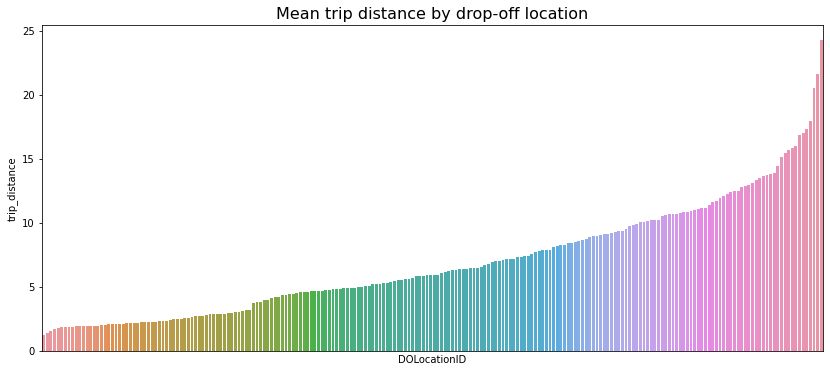

In [34]:
# Create a bar plot of mean trip distances by drop-off location in ascending order by distance

plt.figure(figsize=(14,6))
ax = sns.barplot(x=distance_drop_off.index, 
                 y=distance_drop_off['trip_distance'],
                 order=distance_drop_off.index)
ax.set_xticklabels([])
ax.set_xticks([])
plt.title('Mean trip distance by drop-off location', fontsize=16);

### Hypothesis testing

In [35]:
# Load dataset into dataframe
taxi_data = pd.read_csv("2017_Yellow_Taxi_Trip_Data.csv", index_col = 0)
taxi_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [36]:
credit_card = taxi_data[taxi_data['payment_type']==1]['total_amount']
cash = taxi_data[taxi_data['payment_type']==2]['total_amount']
stats.ttest_ind(a=credit_card,b=cash,equal_var=False)

Ttest_indResult(statistic=20.34644022783838, pvalue=4.5301445359736376e-91)

In [37]:
# Load dataset into dataframe 
df0=pd.read_csv("2017_Yellow_Taxi_Trip_Data.csv") # index_col parameter specified to avoid "Unnamed: 0" column when reading in data from csv

In [38]:
# Start with `.shape` and `.info()`

# Keep `df0` as the original dataframe and create a copy (df) where changes will go
# Can revert `df` to `df0` if needed down the line
df = df0.copy()

# Display the dataset's shape
print(df.shape)

# Display basic info about the dataset
df.info()

(22699, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  flo

In [39]:
# Check the format of the data
### YOUR CODE HERE ###
df['tpep_dropoff_datetime'][0]


'03/25/2017 9:09:47 AM'

In [40]:
# Convert datetime columns to datetime
# Display data types of `tpep_pickup_datetime`, `tpep_dropoff_datetime`
print('Data type of tpep_pickup_datetime:', df['tpep_pickup_datetime'].dtype)
print('Data type of tpep_dropoff_datetime:', df['tpep_dropoff_datetime'].dtype)

# Convert `tpep_pickup_datetime` to datetime format
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], format='%m/%d/%Y %I:%M:%S %p')

# Convert `tpep_dropoff_datetime` to datetime format
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'], format='%m/%d/%Y %I:%M:%S %p')

# Display data types of `tpep_pickup_datetime`, `tpep_dropoff_datetime`
print('Data type of tpep_pickup_datetime:', df['tpep_pickup_datetime'].dtype)
print('Data type of tpep_dropoff_datetime:', df['tpep_dropoff_datetime'].dtype)

df.head(3)

Data type of tpep_pickup_datetime: object
Data type of tpep_dropoff_datetime: object
Data type of tpep_pickup_datetime: datetime64[ns]
Data type of tpep_dropoff_datetime: datetime64[ns]


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75


### Task 2c. Create duration column

In [41]:
# Create `duration` column
### YOUR CODE HERE ###

df['duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime'])/np.timedelta64(1,'m')

### Task 2d. Box plots

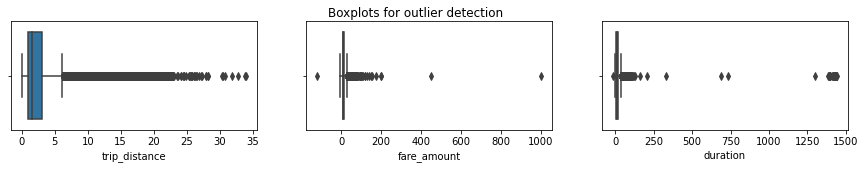

In [42]:
### YOUR CODE HERE ###
fig,axes = plt.subplots(1,3,figsize=(15,2))
fig.suptitle('Boxplots for outlier detection')
sns.boxplot(ax=axes[0],x=df['trip_distance'])
sns.boxplot(ax=axes[1], x=df['fare_amount'])
sns.boxplot(ax=axes[2], x=df['duration'])
plt.show();


### Imputations

In [43]:
# Are trip distances of 0 bad data or very short trips rounded down?
### YOUR CODE HERE ###

sorted(set(df['trip_distance']))[:10]

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]

In [44]:
sum(df['trip_distance']==0)

148

In [45]:
df['fare_amount'].describe()

count    22699.000000
mean        13.026629
std         13.243791
min       -120.000000
25%          6.500000
50%          9.500000
75%         14.500000
max        999.990000
Name: fare_amount, dtype: float64

In [46]:
# Impute values less than $0 with 0
### YOUR CODE HERE ###
df.loc[df['fare_amount']<0,'fare_amount'] =0
df['fare_amount'].min()

0.0

In [47]:
### YOUR CODE HERE ###

def outlier_imputer(column_list,iqr_factor):
    for col in column_list:
        df.loc[df[col]<0,col]=0
        
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    upper_threshold = q3 + (iqr_factor * iqr)
    print(col)
    print('q3:', q3)
    print('upper_threshold:', upper_threshold)
    
    df.loc[df[col] > upper_threshold, col] = upper_threshold
    print(df[col].describe())
    print()
  ### YOUR CODE HERE ###
        # Reassign minimum to zero
        ### YOUR CODE HERE ###

        # Calculate upper threshold
     ### YOUR CODE HERE ###

        # Reassign values > threshold to threshold
      ### YOUR CODE HERE ###
outlier_imputer(['fare_amount'],6)

fare_amount
q3: 14.5
upper_threshold: 62.5
count    22699.000000
mean        12.897913
std         10.541137
min          0.000000
25%          6.500000
50%          9.500000
75%         14.500000
max         62.500000
Name: fare_amount, dtype: float64



In [48]:
# Call .describe() for duration outliers
### YOUR CODE HERE ###
df['duration'].describe()

count    22699.000000
mean        17.013777
std         61.996482
min        -16.983333
25%          6.650000
50%         11.183333
75%         18.383333
max       1439.550000
Name: duration, dtype: float64

In [49]:
# Impute a 0 for any negative values
### YOUR CODE HERE ###
df.loc[df['duration'] < 0, 'duration'] = 0
df['duration'].min()
        

0.0

In [50]:
# Impute the high outliers
### YOUR CODE HERE ###
outlier_imputer(['duration'],6)

duration
q3: 18.383333333333333
upper_threshold: 88.78333333333333
count    22699.000000
mean        14.460555
std         11.947043
min          0.000000
25%          6.650000
50%         11.183333
75%         18.383333
max         88.783333
Name: duration, dtype: float64



### Feature engineering

In [51]:
# Create `pickup_dropoff` column
### YOUR CODE HERE ###
df['pickup_dropoff'] = df['PULocationID'].astype(str)+' '+df['DOLocationID'].astype(str)
df['pickup_dropoff'].head(2)

0    100 231
1     186 43
Name: pickup_dropoff, dtype: object

In [52]:
### YOUR CODE HERE ###
grouped = df.groupby('pickup_dropoff').mean(numeric_only=True)[['trip_distance']]
grouped[:5]

,trip_distance
pickup_dropoff,
1 1,2.433333
10 148,15.700000
100 1,16.890000
100 100,0.253333
100 107,1.180000


In [53]:
# 1. Convert `grouped` to a dictionary
### YOUR CODE HERE ###
grouped_dict = grouped.to_dict()

# 2. Reassign to only contain the inner dictionary
### YOUR CODE HERE ###
grouped_dict = grouped_dict['trip_distance']

In [54]:
# 1. Create a mean_distance column that is a copy of the pickup_dropoff helper column
### YOUR CODE HERE ###
df['mean_distance'] = df['pickup_dropoff']

# 2. Map `grouped_dict` to the `mean_distance` column
### YOUR CODE HERE ###
df['mean_distance'] = df['mean_distance'].map(grouped_dict)

# Confirm that it worked
### YOUR CODE HERE ###
df[(df['PULocationID']==100) & (df['DOLocationID']==231)][['mean_distance']]


,mean_distance
0,3.521667
4909,3.521667
16636,3.521667
18134,3.521667
19761,3.521667
20581,3.521667


In [55]:
grouped = df.groupby('pickup_dropoff').mean(numeric_only=True)[['duration']]
grouped

# Create a dictionary where keys are unique pickup_dropoffs and values are
# mean trip duration for all trips with those pickup_dropoff combos
grouped_dict = grouped.to_dict()
grouped_dict = grouped_dict['duration']

df['mean_duration'] = df['pickup_dropoff']
df['mean_duration'] = df['mean_duration'].map(grouped_dict)

# Confirm that it worked
df[(df['PULocationID']==100) & (df['DOLocationID']==231)][['mean_duration']]

,mean_duration
0,22.847222
4909,22.847222
16636,22.847222
18134,22.847222
19761,22.847222
20581,22.847222


In [56]:
# Create 'day' col
### YOUR CODE HERE ###
df['day'] = df['tpep_pickup_datetime'].dt.day_name().str.lower()

# Create 'month' col
### YOUR CODE HERE ###
df['month'] = df['tpep_pickup_datetime'].dt.strftime('%b').str.lower()
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,2.76,0.0,0.3,16.56,14.066667,100 231,3.521667,22.847222,saturday,mar
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,4.00,0.0,0.3,20.80,26.500000,186 43,3.108889,24.470370,tuesday,apr
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,1.45,0.0,0.3,8.75,7.200000,262 236,0.881429,7.250000,friday,dec
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,6.39,0.0,0.3,27.69,30.250000,188 97,3.700000,30.250000,sunday,may
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,0.00,0.0,0.3,17.80,16.716667,4 112,4.435000,14.616667,saturday,apr


In [57]:
# Create 'rush_hour' col
### YOUR CODE HERE ###
df['rush_hour'] = df['tpep_pickup_datetime'].dt.hour

# If day is Saturday or Sunday, impute 0 in `rush_hour` column
### YOUR CODE HERE ###
df.loc[df['day'].isin(['Saturday','Sunday']),'rush_hour'] = 0

In [58]:
### YOUR CODE HERE ###
def rush_hourizer(hour):
    if 6<=hour['rush_hour'] < 10:
        val=1
    elif 16<=hour['rush_hour']<20:
        val=1
    else:
        val = 0
    return val

In [59]:
# Apply the `rush_hourizer()` function to the new column
### YOUR CODE HERE ###
df['rush_hour'] = df.apply(rush_hourizer,axis=1)
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month,rush_hour
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,0.0,0.3,16.56,14.066667,100 231,3.521667,22.847222,saturday,mar,1
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,0.0,0.3,20.80,26.500000,186 43,3.108889,24.470370,tuesday,apr,0
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,0.0,0.3,8.75,7.200000,262 236,0.881429,7.250000,friday,dec,1
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,0.0,0.3,27.69,30.250000,188 97,3.700000,30.250000,sunday,may,0
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,0.0,0.3,17.80,16.716667,4 112,4.435000,14.616667,saturday,apr,0


### Scatter plot

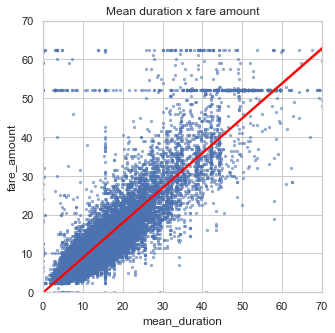

In [60]:
# Create a scatterplot to visualize the relationship between variables of interest
### YOUR CODE HERE ###
sns.set(style='whitegrid')
f = plt.figure()
f.set_figwidth(5)
f.set_figheight(5)
sns.regplot(x=df['mean_duration'], y=df['fare_amount'],
            scatter_kws={'alpha':0.5, 's':5},
            line_kws={'color':'red'})
plt.ylim(0, 70)
plt.xlim(0, 70)
plt.title('Mean duration x fare amount')
plt.show()


In [61]:
### YOUR CODE HERE ###
df[df['fare_amount']>50]['fare_amount'].value_counts().head()

52.0    514
62.5     84
59.0      9
50.5      9
57.5      8
Name: fare_amount, dtype: int64

In [62]:
# Set pandas to display all columns
### YOUR CODE HERE ###
pd.set_option('display.max_columns', None)
df[df['fare_amount']==52].head(30)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month,rush_hour
11,18600059,2,2017-03-05 19:15:30,2017-03-05 19:52:18,2,18.90,2,N,236,132,1,52.0,0.0,0.5,14.58,5.54,0.3,72.92,36.800000,236 132,19.211667,40.500000,sunday,mar,1
110,47959795,1,2017-06-03 14:24:57,2017-06-03 15:31:48,1,18.00,2,N,132,163,1,52.0,0.0,0.5,0.00,0.00,0.3,52.80,66.850000,132 163,19.229000,52.941667,saturday,jun,0
161,95729204,2,2017-11-11 20:16:16,2017-11-11 20:17:14,1,0.23,2,N,132,132,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,0.966667,132 132,2.255862,3.021839,saturday,nov,0
247,103404868,2,2017-12-06 23:37:08,2017-12-07 00:06:19,1,18.93,2,N,132,79,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,29.183333,132 79,19.431667,47.275000,wednesday,dec,0
379,80479432,2,2017-09-24 23:45:45,2017-09-25 00:15:14,1,17.99,2,N,132,234,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,29.483333,132 234,17.654000,49.833333,sunday,sep,0
388,16226157,1,2017-02-28 18:30:05,2017-02-28 19:09:55,1,18.40,2,N,132,48,2,52.0,4.5,0.5,0.00,5.54,0.3,62.84,39.833333,132 48,18.761905,58.246032,tuesday,feb,1
406,55253442,2,2017-06-05 12:51:58,2017-06-05 13:07:35,1,4.73,2,N,228,88,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,15.616667,228 88,4.730000,15.616667,monday,jun,0
449,65900029,2,2017-08-03 22:47:14,2017-08-03 23:32:41,2,18.21,2,N,132,48,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,45.450000,132 48,18.761905,58.246032,thursday,aug,0
468,80904240,2,2017-09-26 13:48:26,2017-09-26 14:31:17,1,17.27,2,N,186,132,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,42.850000,186 132,17.096000,42.920000,tuesday,sep,0
520,33706214,2,2017-04-23 21:34:48,2017-04-23 22:46:23,6,18.34,2,N,132,148,1,52.0,0.0,0.5,5.00,0.00,0.3,57.80,71.583333,132 148,17.994286,46.340476,sunday,apr,0


### Isolate modeling variables

In [63]:
### YOUR CODE HERE ###
df2 = df.copy()

df2 = df2.drop(['Unnamed: 0', 'tpep_dropoff_datetime', 'tpep_pickup_datetime',
               'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
               'payment_type', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
               'total_amount', 'tpep_dropoff_datetime', 'tpep_pickup_datetime', 'duration',
               'pickup_dropoff', 'day', 'month'
               ], axis=1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22699 non-null  int64  
 1   passenger_count  22699 non-null  int64  
 2   fare_amount      22699 non-null  float64
 3   mean_distance    22699 non-null  float64
 4   mean_duration    22699 non-null  float64
 5   rush_hour        22699 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.0 MB


### Pair plot

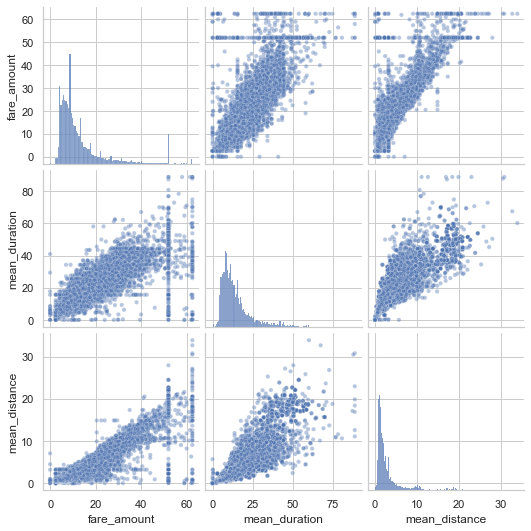

In [64]:
# Create a pairplot to visualize pairwise relationships between variables in the data
### YOUR CODE HERE ###
sns.pairplot(df2[['fare_amount','mean_duration','mean_distance']],plot_kws={'alpha':0.4, 'size':5})

### Identify correlations

In [65]:
# Correlation matrix to help determine most correlated variables
### YOUR CODE HERE ###
df2.corr(method='pearson')

,VendorID,passenger_count,fare_amount,mean_distance,mean_duration,rush_hour
VendorID,1.000000,0.266463,0.001045,0.004741,0.001876,-0.006550
passenger_count,0.266463,1.000000,0.014942,0.013428,0.015852,-0.011076
fare_amount,0.001045,0.014942,1.000000,0.910185,0.859105,-0.015012
mean_distance,0.004741,0.013428,0.910185,1.000000,0.874864,-0.028227
mean_duration,0.001876,0.015852,0.859105,0.874864,1.000000,-0.016576
rush_hour,-0.006550,-0.011076,-0.015012,-0.028227,-0.016576,1.000000


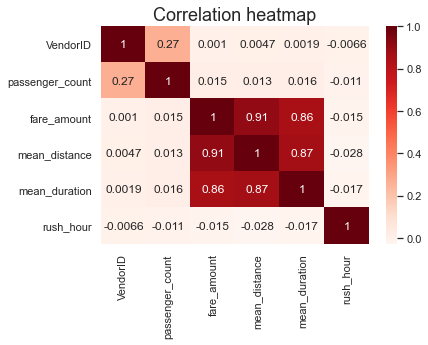

In [66]:
# Create correlation heatmap
### YOUR CODE HERE ###

plt.figure(figsize=(6,4))
sns.heatmap(df2.corr(method='pearson'), annot=True, cmap='Reds')
plt.title('Correlation heatmap',
          fontsize=18)
plt.show()

### Split data into outcome variable and features

In [67]:
# Remove the target column from the features
X = df2.drop(columns='fare_amount')
### YOUR CODE HERE ###

# Set y variable
### YOUR CODE HERE ###
y=df2[['fare_amount']]
# Display first few rows
### YOUR CODE HERE ###
X.head()

,VendorID,passenger_count,mean_distance,mean_duration,rush_hour
0,2,6,3.521667,22.847222,1
1,1,1,3.108889,24.470370,0
2,1,1,0.881429,7.250000,1
3,2,1,3.700000,30.250000,0
4,2,1,4.435000,14.616667,0


### Pre-process data

In [68]:
# Convert VendorID to string
### YOUR CODE HERE ###

X['VendorID'] = X['VendorID'].astype(str)
# Get dummies
### YOUR CODE HERE ###
X = pd.get_dummies(X,drop_first=True)
X.head()

,passenger_count,mean_distance,mean_duration,rush_hour,VendorID_2
0,6,3.521667,22.847222,1,1
1,1,3.108889,24.470370,0,0
2,1,0.881429,7.250000,1,0
3,1,3.700000,30.250000,0,1
4,1,4.435000,14.616667,0,1


In [69]:
# Standardize the X variables
### YOUR CODE HERE ###
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print('X scaled:', X_scaled)

X scaled: [[ 3.39065627  0.17093801  0.83195364  1.26389746  0.8931955 ]
 [-0.4997803   0.05495383  0.99296921 -0.79120343 -1.11957573]
 [-0.4997803  -0.57092814 -0.7152838   1.26389746 -1.11957573]
 ...
 [-0.4997803  -0.62633441 -0.77886169 -0.79120343  0.8931955 ]
 [-0.4997803  -0.23485053  0.21719198 -0.79120343  0.8931955 ]
 [-0.4997803  -0.40359028 -0.50145366 -0.79120343 -1.11957573]]


In [70]:
# Create training and testing sets
#### YOUR CODE HERE ####
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

In [71]:
# Fit your model to the training data
### YOUR CODE HERE ###

lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

### Evaluate model

### Train data

In [72]:
# Evaluate the model performance on the training data
### YOUR CODE HERE ###
r_sq_train = lr.score(X_train,y_train)
print('Coefficient of determination:', r_sq_train)
y_pred_train = lr.predict(X_train)
print('R^2:', r2_score(y_train, y_pred_train))
print('MAE:', mean_absolute_error(y_train, y_pred_train))
print('MSE:', mean_squared_error(y_train, y_pred_train))
print('RMSE:',np.sqrt(mean_squared_error(y_train, y_pred_train)))


Coefficient of determination: 0.8397756706505115
R^2: 0.8397756706505115
MAE: 2.1892862517954104
MSE: 17.897304971443727
RMSE: 4.2305206501616


### Test data

In [73]:
# Evaluate the model performance on the testing data
### YOUR CODE HERE ###
r_sq_test = lr.score(X_test, y_test)
print('Coefficient of determination:', r_sq_test)
y_pred_test = lr.predict(X_test)
print('R^2:', r2_score(y_test, y_pred_test))
print('MAE:', mean_absolute_error(y_test,y_pred_test))
print('MSE:', mean_squared_error(y_test, y_pred_test))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred_test)))


Coefficient of determination: 0.8680947659893781
R^2: 0.8680947659893781
MAE: 2.135592265112355
MSE: 14.344244902931342
RMSE: 3.7873796882450725


### Results

In [74]:
# Create a `results` dataframe
### YOUR CODE HERE ###

results = pd.DataFrame(data={'actual': y_test['fare_amount'],
                             'predicted': y_pred_test.ravel()})
results['residual'] = results['actual'] - results['predicted']
results.reset_index(inplace=True,drop=True)
results

,actual,predicted,residual
0,14.0,12.375584,1.624416
1,28.0,16.336415,11.663585
2,5.5,6.745509,-1.245509
3,15.5,16.244218,-0.744218
4,9.5,10.554608,-1.054608
...,...,...,...
4535,21.5,20.706752,0.793248
4536,5.5,6.089789,-0.589789
4537,9.0,7.310186,1.689814
4538,7.0,6.714544,0.285456


### Visualize model results

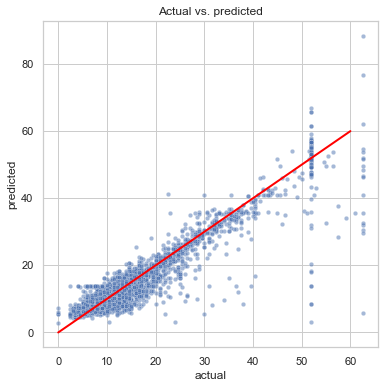

In [75]:
# Create a scatterplot to visualize `predicted` over `actual`
### YOUR CODE HERE ###
fig, ax = plt.subplots(figsize=(6, 6))
sns.set(style='whitegrid')
sns.scatterplot(x='actual',
                y='predicted',
                data=results,
                s=20,
                alpha=0.5,
                ax=ax
)
plt.plot([0,60], [0,60], c='red', linewidth=2)
plt.title('Actual vs. predicted');


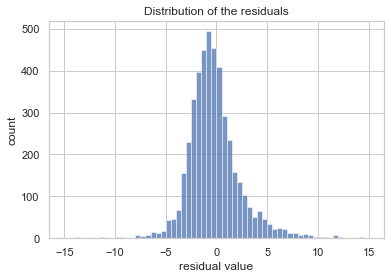

In [76]:
# Visualize the distribution of the `residuals`
### YOUR CODE HERE ###
sns.histplot(results['residual'], bins=np.arange(-15,15.5,0.5))
plt.title('Distribution of the residuals')
plt.xlabel('residual value')
plt.ylabel('count');


In [77]:
# Calculate residual mean
### YOUR CODE HERE ###
results['residual'].mean()

-0.015460834069770784

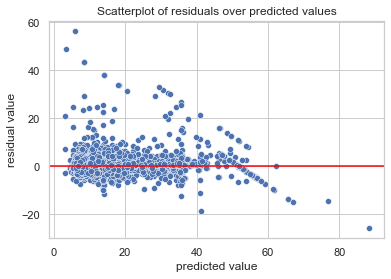

In [78]:
# Create a scatterplot of `residuals` over `predicted`
### YOUR CODE HERE ###

sns.scatterplot(x='predicted', y='residual', data=results)
plt.axhline(0, c='red')
plt.title('Scatterplot of residuals over predicted values')
plt.xlabel('predicted value')
plt.ylabel('residual value')
plt.show()

### Coefficients

In [79]:
# Output the model's coefficients
coefficients = pd.DataFrame(lr.coef_, columns=X.columns)
coefficients

,passenger_count,mean_distance,mean_duration,rush_hour,VendorID_2
0,0.029112,7.096307,2.810848,0.067471,-0.053941


In [80]:
### Creating and Saving the Dataset

In [81]:
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month,rush_hour
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.066667,100 231,3.521667,22.847222,saturday,mar,1
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.500000,186 43,3.108889,24.470370,tuesday,apr,0
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.200000,262 236,0.881429,7.250000,friday,dec,1
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000,188 97,3.700000,30.250000,sunday,may,0
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,16.716667,4 112,4.435000,14.616667,saturday,apr,0


In [82]:
nyc_preds = df[['mean_duration','mean_distance']]
nyc_preds = nyc_preds.assign(predicted_fare=results['predicted'])
nyc_preds.to_csv('nyc_preds_means.csv')

### Build a machine learning model

In [83]:
# RUN THE CELL BELOW TO IMPORT YOUR DATA. 

# Load dataset into dataframe
df0 = pd.read_csv('2017_Yellow_Taxi_Trip_Data.csv')

# Import predicted fares and mean distance and duration from previous course
nyc_preds_means = pd.read_csv('nyc_preds_means.csv')

In [84]:
# Inspect the first few rows of df0
### YOUR CODE HERE ###
df0.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [85]:
# Inspect the first few rows of `nyc_preds_means`
### YOUR CODE HERE ###
nyc_preds_means.head()

,Unnamed: 0,mean_duration,mean_distance,predicted_fare
0,0,22.847222,3.521667,12.375584
1,1,24.470370,3.108889,16.336415
2,2,7.250000,0.881429,6.745509
3,3,30.250000,3.700000,16.244218
4,4,14.616667,4.435000,10.554608


In [86]:
# Merge datasets
### YOUR CODE HERE ###
df0 = df0.merge(nyc_preds_means,left_index=True,right_index=True)
df0.head()

,Unnamed: 0_x,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,Unnamed: 0_y,mean_duration,mean_distance,predicted_fare
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,0,22.847222,3.521667,12.375584
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,1,24.470370,3.108889,16.336415
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,2,7.250000,0.881429,6.745509
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,3,30.250000,3.700000,16.244218
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,4,14.616667,4.435000,10.554608


In [87]:
# Subset the data to isolate only customers who paid by credit card
#==> ENTER YOUR CODE HERE
df1 = df0[df0['payment_type']==1]

In [88]:

# Create tip % col
#==> ENTER YOUR CODE HERE

df1['tip_percent'] = df1['tip_amount'] / (df1['total_amount'] - df1['tip_amount'])

<ipython-input-88-1c1c460d2ed1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['tip_percent'] = df1['tip_amount'] / (df1['total_amount'] - df1['tip_amount'])


In [89]:
# Create 'generous' col (target)
#==> ENTER YOUR CODE HERE
df1['generous'] = df1['tip_percent']
df1['generous'] = (df1['generous']>=0.20)
df1['generous'] = df1['generous'].astype(int)

<ipython-input-89-46900dc57733>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['generous'] = df1['tip_percent']
<ipython-input-89-46900dc57733>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['generous'] = (df1['generous']>=0.20)
<ipython-input-89-46900dc57733>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

In [90]:
# Convert pickup and dropoff cols to datetime
#==> ENTER YOUR CODE HERE
df1['tpep_pickup_datetime'] = pd.to_datetime(df1['tpep_pickup_datetime'], format='%m/%d/%Y %I:%M:%S %p')
df1['tpep_dropoff_datetime'] = pd.to_datetime(df1['tpep_dropoff_datetime'], format='%m/%d/%Y %I:%M:%S %p')

<ipython-input-90-18621b45b1b2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['tpep_pickup_datetime'] = pd.to_datetime(df1['tpep_pickup_datetime'], format='%m/%d/%Y %I:%M:%S %p')
<ipython-input-90-18621b45b1b2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['tpep_dropoff_datetime'] = pd.to_datetime(df1['tpep_dropoff_datetime'], format='%m/%d/%Y %I:%M:%S %p')


In [91]:
# Create a 'day' col
#==> ENTER YOUR CODE HERE
df1['day'] = df1['tpep_pickup_datetime'].dt.day_name().str.lower()

<ipython-input-91-f53d218c19cd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['day'] = df1['tpep_pickup_datetime'].dt.day_name().str.lower()


In [92]:
# Create 'am_rush' col
#==> ENTER YOUR CODE HERE
df1['am_rush'] = df1['tpep_pickup_datetime'].dt.hour
# Create 'daytime' col
#==> ENTER YOUR CODE HERE
df1['daytime'] = df1['tpep_pickup_datetime'].dt.hour
# Create 'pm_rush' col
#==> ENTER YOUR CODE HERE
df1['pm_rush'] = df1['tpep_pickup_datetime'].dt.hour

# Create 'nighttime' col
df1['nighttime'] = df1['tpep_pickup_datetime'].dt.hour

# Create 'nighttime' col
#==> ENTER YOUR CODE HERE'
df1.head()

<ipython-input-92-fc6f017aa57c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['am_rush'] = df1['tpep_pickup_datetime'].dt.hour
<ipython-input-92-fc6f017aa57c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['daytime'] = df1['tpep_pickup_datetime'].dt.hour
<ipython-input-92-fc6f017aa57c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

,Unnamed: 0_x,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,Unnamed: 0_y,mean_duration,mean_distance,predicted_fare,tip_percent,generous,day,am_rush,daytime,pm_rush,nighttime
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,0,22.847222,3.521667,12.375584,0.200000,1,saturday,8,8,8,8
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,1,24.470370,3.108889,16.336415,0.238095,1,tuesday,14,14,14,14
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,2,7.250000,0.881429,6.745509,0.198630,0,friday,7,7,7,7
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,3,30.250000,3.700000,16.244218,0.300000,1,sunday,13,13,13,13
5,23345809,2,2017-03-25 20:34:11,2017-03-25 20:42:11,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36,5,11.855376,2.052258,20.935613,0.200000,1,saturday,20,20,20,20


In [93]:
# Define 'am_rush()' conversion function [06:00–10:00)
    #==> ENTER YOUR CODE HERE
def am_rush(hour):
    if 6 <= hour['am_rush'] < 10:
        val = 1
    else:
        val = 0
    return val

In [94]:
# Apply 'am_rush' function to the 'am_rush' series
#==> ENTER YOUR CODE HERE
df1['am_rush'] = df1.apply(am_rush, axis=1)
df1['am_rush'].head()

<ipython-input-94-c8f71a8c59f0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['am_rush'] = df1.apply(am_rush, axis=1)


0    1
1    0
2    1
3    0
5    0
Name: am_rush, dtype: int64

In [95]:
# Define 'daytime()' conversion function [10:00–16:00)
#==> ENTER YOUR CODE HERE
def daytime(hour):
    if 10 <= hour['daytime'] < 16:
        val = 1
    else:
        val = 0
    return val

In [96]:
# Apply 'daytime()' function to the 'daytime' series
#==> ENTER YOUR CODE HERE
df1['daytime'] = df1.apply(daytime, axis=1)

<ipython-input-96-d0fef471e147>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['daytime'] = df1.apply(daytime, axis=1)


In [97]:
# Define 'pm_rush()' conversion function [16:00–20:00)
#==> ENTER YOUR CODE HERE
def pm_rush(hour):
    if 16 <= hour['pm_rush'] < 20:
        val = 1
    else:
        val = 0
    return val

In [98]:
# Apply 'pm_rush()' function to the 'pm_rush' series
#==> ENTER YOUR CODE HERE
df1['pm_rush'] = df1.apply(pm_rush, axis=1)

<ipython-input-98-efb2a31ac5a7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['pm_rush'] = df1.apply(pm_rush, axis=1)


In [99]:
# Define 'nighttime()' conversion function [20:00–06:00)
#==> ENTER YOUR CODE HERE
def nighttime(hour):
    if 20 <= hour['nighttime'] < 24:
        val = 1
    elif 0 <= hour['nighttime'] < 6:
        val = 1
    else:
        val = 0
    return val

In [100]:
# Apply 'nighttime' function to the 'nighttime' series
#==> ENTER YOUR CODE HERE
df1['nighttime'] = df1.apply(nighttime, axis=1)

<ipython-input-100-17361cae256c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['nighttime'] = df1.apply(nighttime, axis=1)


In [101]:
# Create 'month' col
#==> ENTER YOUR CODE HERE
df1['month'] = df1['tpep_pickup_datetime'].dt.strftime('%b').str.lower()

<ipython-input-101-19a67735d4c1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['month'] = df1['tpep_pickup_datetime'].dt.strftime('%b').str.lower()


In [102]:
#==> ENTER YOUR CODE HERE
df1.head()

,Unnamed: 0_x,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,Unnamed: 0_y,mean_duration,mean_distance,predicted_fare,tip_percent,generous,day,am_rush,daytime,pm_rush,nighttime,month
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,0,22.847222,3.521667,12.375584,0.200000,1,saturday,1,0,0,0,mar
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,1,24.470370,3.108889,16.336415,0.238095,1,tuesday,0,1,0,0,apr
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,2,7.250000,0.881429,6.745509,0.198630,0,friday,1,0,0,0,dec
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,3,30.250000,3.700000,16.244218,0.300000,1,sunday,0,1,0,0,may
5,23345809,2,2017-03-25 20:34:11,2017-03-25 20:42:11,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36,5,11.855376,2.052258,20.935613,0.200000,1,saturday,0,0,0,1,mar


In [103]:
# Drop columns
#==> ENTER YOUR CODE HERE
df1.info()

drop_cols = ['Unnamed: 0_x', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
             'payment_type', 'trip_distance', 'store_and_fwd_flag', 'payment_type',
             'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
             'improvement_surcharge', 'total_amount','Unnamed: 0_y', 'tip_percent']

df1 = df1.drop(drop_cols, axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15265 entries, 0 to 22698
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0_x           15265 non-null  int64         
 1   VendorID               15265 non-null  int64         
 2   tpep_pickup_datetime   15265 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  15265 non-null  datetime64[ns]
 4   passenger_count        15265 non-null  int64         
 5   trip_distance          15265 non-null  float64       
 6   RatecodeID             15265 non-null  int64         
 7   store_and_fwd_flag     15265 non-null  object        
 8   PULocationID           15265 non-null  int64         
 9   DOLocationID           15265 non-null  int64         
 10  payment_type           15265 non-null  int64         
 11  fare_amount            15265 non-null  float64       
 12  extra                  15265 non-null  float64       
 13  m

In [104]:
# 1. Define list of cols to convert to string
#==> ENTER YOUR CODE HERE
cols_to_str = ['RatecodeID', 'PULocationID', 'DOLocationID', 'VendorID']


# 2. Convert each column to string
#==> ENTER YOUR CODE HERE
for col in cols_to_str:
    df1[col] = df1[col].astype('str')


In [105]:
# Convert categoricals to binary
#==> ENTER YOUR CODE HERE
df2 = pd.get_dummies(df1, drop_first=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15265 entries, 0 to 22698
Columns: 347 entries, passenger_count to month_sep
dtypes: float64(3), int32(1), int64(5), uint8(338)
memory usage: 6.0 MB


In [106]:
df2['generous'].value_counts()

0    9944
1    5321
Name: generous, dtype: int64

In [205]:
# Isolate target variable (y)
#==> ENTER YOUR CODE HERE
y = df2['generous']

# Isolate the features (X)
#==> ENTER YOUR CODE HERE
X = df2.drop('generous',axis=1)
# Split into train and test sets
#==> ENTER YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [206]:
# 1. Instantiate the random forest classifier
#==> ENTER YOUR CODE HERE
rf = RandomForestClassifier(random_state=0)
# 2. Create a dictionary of hyperparameters to tune 
#==> ENTER YOUR CODE HERE
cv_params = {'max_depth':[None],
            'max_features':[1.0],
            'max_samples':[0.7],
            'min_samples_leaf':[1],
            'min_samples_split':[2],
            'n_estimators':[300]}
# 3. Define a dictionary of scoring metrics to capture
#==> ENTER YOUR CODE HERE
scoring = {'accuracy','precision','recall','f1'}

# 4. Instantiate the GridSearchCV object
#==> ENTER YOUR CODE HERE
rf1 = GridSearchCV(rf,cv_params,scoring=scoring,cv=4,refit='f1')

In [201]:
y_train.dropna()
y_test.dropna()

15317    0
11238    1
13799    0
5496     0
7584     1
        ..
5604     1
3479     0
9681     1
4801     0
22290    1
Name: generous, Length: 3053, dtype: int32

In [207]:
X_train['predicted_fare'].fillna(X_train['predicted_fare'].mean(),inplace=True)
X_test['predicted_fare'].fillna(X_test['predicted_fare'].mean(),inplace=True)
print(y_train.isna())

7688     False
8881     False
5723     False
5152     False
14475    False
         ...  
22409    False
5023     False
16306    False
18459    False
15425    False
Name: generous, Length: 12212, dtype: bool


D:\anaconda3\lib\site-packages\pandas\core\series.py:4433: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [208]:
print(X_train.shape,y_train.shape,type(X_train.iloc[0][0]),type(y_train.iloc[0]))

(12212, 346) (12212,) <class 'numpy.float64'> <class 'numpy.int32'>


In [209]:
#==> ENTER YOUR CODE HERE
rf1.fit(X_train,y_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [None], 'max_features': [1.0],
                         'max_samples': [0.7], 'min_samples_leaf': [1],
                         'min_samples_split': [2], 'n_estimators': [300]},
             refit='f1', scoring={'f1', 'recall', 'accuracy', 'precision'})

In [210]:
import pickle 

# Define a path to the folder where you want to save the model
path = '/home/jovyan/work/'

In [211]:
def write_pickle(path, model_object, save_name:str):
    '''
    save_name is a string.
    '''
    with open(path + save_name + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [212]:
def read_pickle(path, saved_model_name:str):
    '''
    saved_model_name is a string.
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

        return model

In [213]:
# Examine best score
#==> ENTER YOUR CODE HERE
rf1.best_score_

0.3213492460260803

In [214]:
#==> ENTER YOUR CODE HERE
rf1.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [216]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
    model_name (string): what you want the model to be called in the output table
    model_object: a fit GridSearchCV object
    metric (string): precision, recall, f1, or accuracy

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                 'recall': 'mean_test_recall',
                 'f1': 'mean_test_f1',
                 'accuracy': 'mean_test_accuracy',
                 }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy],
                        },
                       )

    return table

In [217]:
#==> ENTER YOUR CODE HERE
def make_results(model_name:str,model_object,metric:str):
    metric_dict = {'precision':'mean_test_precision',
                  'recall':'mean_test_recall',
                  'f1':'mean_test_f1',
                  'accuracy':'mean_test_accuracy'}
    
    cv_results = pd.DataFrame(model_object.cv_results_)
    
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(),:]
    
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy],
                        },
                       )

    return table

results = make_results('RF CV', rf1, 'f1')
results

,model,precision,recall,F1,accuracy
0,RF CV,0.440291,0.253706,0.321349,0.627334


In [218]:
# Get scores on test data
#==> ENTER YOUR CODE HERE
preds = rf1.best_estimator_.predict(X_test)

In [219]:
def get_test_scores(model_name:str, preds, y_test_data):
    '''
    Generate a table of test scores.

    In:
    model_name (string): Your choice: how the model will be named in the output table
    preds: numpy array of test predictions
    y_test_data: numpy array of y_test data

    Out:
    table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy]
                        })

    return table

In [220]:
 # Get scores on test data
#==> ENTER YOUR CODE HERE
rf_test_scores = get_test_scores('RF test', preds, y_test)
results = pd.concat([results, rf_test_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF CV,0.440291,0.253706,0.321349,0.627334
0,RF test,0.459588,0.272556,0.342183,0.634785


In [221]:
# 1. Instantiate the XGBoost classifier
#==> ENTER YOUR CODE HERE
xgb = XGBClassifier(objective='binary:logistic',random_state=0)
# 2. Create a dictionary of hyperparameters to tune
#==> ENTER YOUR CODE HERE
cv_params = {'learning_rate': [0.1],
             'max_depth': [8],
             'min_child_weight': [2],
             'n_estimators': [500]
             }


# 3. Define a dictionary of scoring metrics to capture
#==> ENTER YOUR CODE HERE
scoring = {'accuracy','precision','recall','f1'}
# 4. Instantiate the GridSearchCV object
#==> ENTER YOUR CODE HERE
xgb1 = GridSearchCV(xgb, cv_params, scoring=scoring, cv=4, refit='f1')

In [222]:
%%time
#==> ENTER YOUR CODE HERE
xgb1.fit(X_train,y_train)

Wall time: 9.12 s


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None

In [223]:
# Examine best score
#==> ENTER YOUR CODE HERE
xgb1.best_score_

0.35329758245483867

In [224]:
# Examine best parameters
#==> ENTER YOUR CODE HERE
xgb1.best_params_

{'learning_rate': 0.1,
 'max_depth': 8,
 'min_child_weight': 2,
 'n_estimators': 500}

In [225]:
# Call 'make_results()' on the GridSearch object
#==> ENTER YOUR CODE HERE
xgb1_cv_results = make_results('XGB CV',xgb1,'f1')
results = pd.concat([results, xgb1_cv_results], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF CV,0.440291,0.253706,0.321349,0.627334
0,RF test,0.459588,0.272556,0.342183,0.634785
0,XGB CV,0.438971,0.295986,0.353298,0.622584


In [226]:
# Get scores on test data
#==> ENTER YOUR CODE HERE
preds = xgb1.best_estimator_.predict(X_test)

In [227]:
# Get scores on test data
#==> ENTER YOUR CODE HERE
xgb_test_scores = get_test_scores('XGB test', preds, y_test)
results = pd.concat([results, xgb_test_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF CV,0.440291,0.253706,0.321349,0.627334
0,RF test,0.459588,0.272556,0.342183,0.634785
0,XGB CV,0.438971,0.295986,0.353298,0.622584
0,XGB test,0.446221,0.288534,0.350457,0.627252


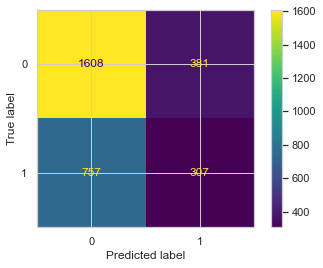

In [228]:
# Generate array of values for confusion matrix
cm = confusion_matrix(y_test, preds, labels=xgb1.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=xgb1.classes_)
disp.plot();

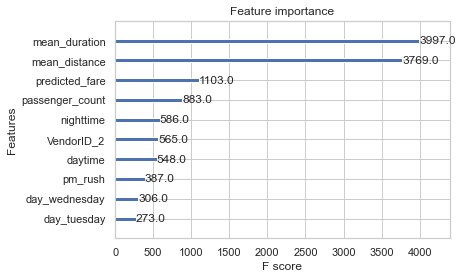

In [229]:
#==> ENTER YOUR CODE 
plot_importance(xgb1.best_estimator_, max_num_features=10);